## Import Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
customers = pd.read_csv(r'/content/Customers.csv')
products = pd.read_csv(r'/content/Products.csv')
transactions = pd.read_csv(r'/content/Transactions.csv')

In [10]:
customers.head(), products.head(), transactions.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

## Merge dataset

In [8]:
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [32]:
#Check for null values
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [12]:
data.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
CustomerName,0
Region,0
SignupDate,0


In [13]:
data.duplicated().sum()

0

### **1.Sales Trend over Time:**

This line chart shows how the total sales have changed over time, typically on a monthly basis. It helps identify patterns and trends in sales performance.

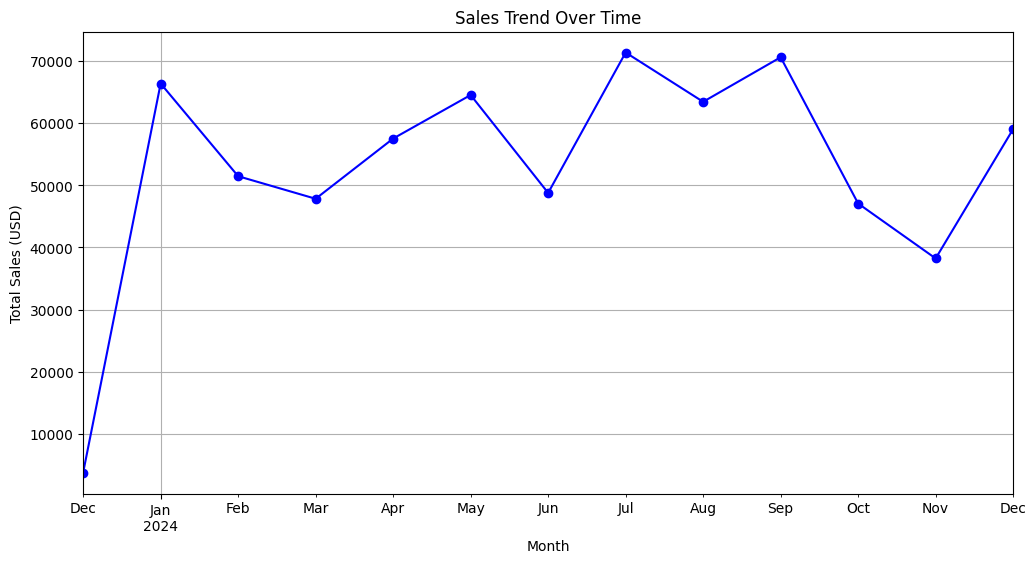

In [22]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
sales_trend = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', title='Sales Trend Over Time', ylabel='Total Sales (USD)', xlabel='Month',
                    color='blue', linestyle='-', marker='o')  # Customize line and markers
plt.grid(True)
plt.show()

## Average Transaction Value over Time:

This line chart shows how the average value of transactions has changed over time, indicating trends in customer spending behavior.

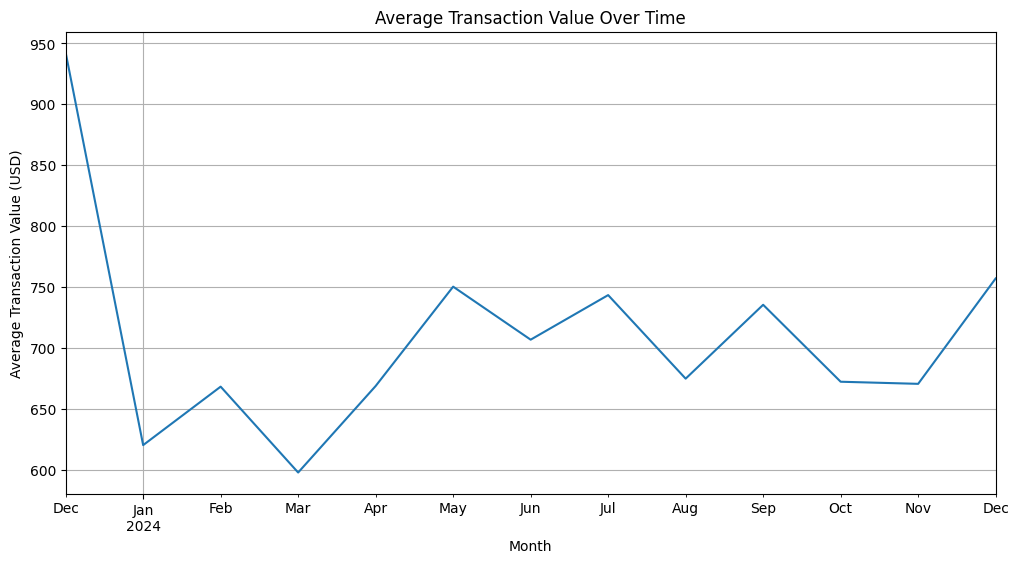

In [33]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
avg_transaction_value = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].mean()

plt.figure(figsize=(12, 6))
avg_transaction_value.plot(kind='line', title='Average Transaction Value Over Time',
                           ylabel='Average Transaction Value (USD)', xlabel='Month')
plt.grid(True)
plt.show()

## Customer Distribution by Region:

This bar chart displays the number of customers in each region, helps to  understand where your customer base is concentrated.

<ipython-input-23-0b33534d2aef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")  # Use a color palette


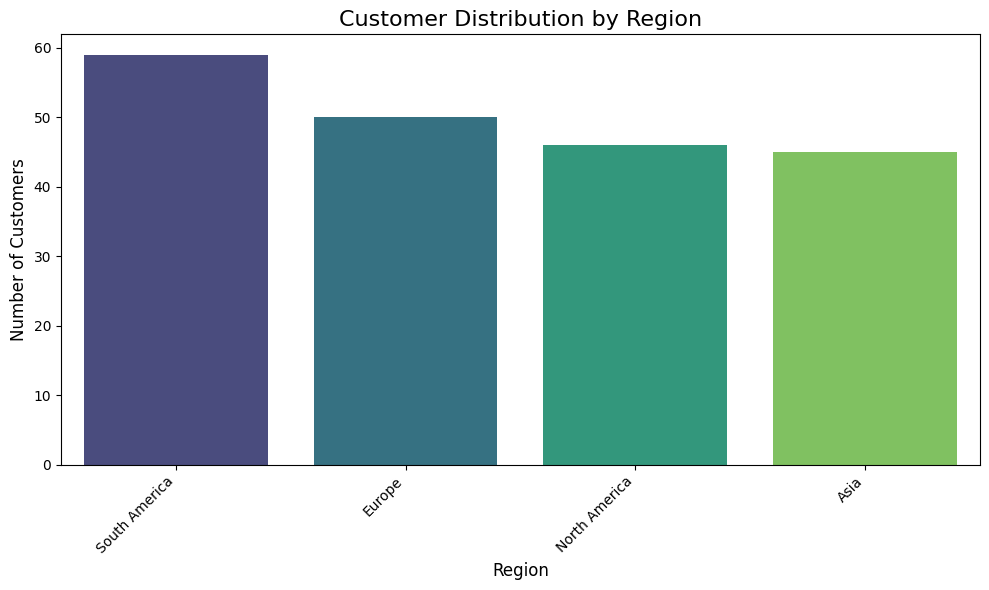

In [23]:
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Product Distribution by Category:

This bar chart shows the distribution of products across different categories, providing insights into product variety and popularity.

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-34-ba70d3ca328e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


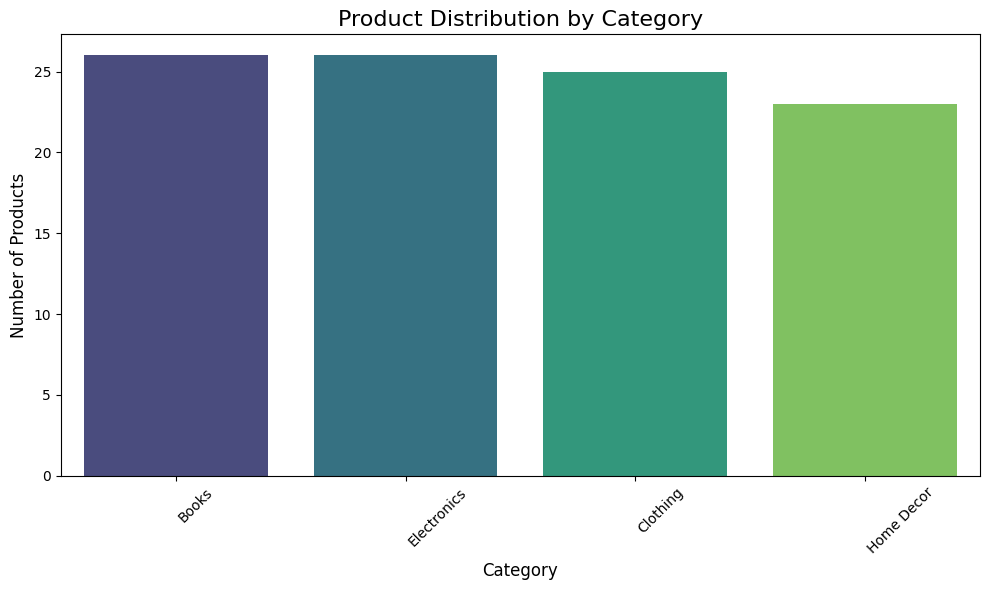

In [34]:
category_counts = products['Category'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Product Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='left', fontsize=10)
plt.tight_layout()
plt.show()

## Customer Spending Distribution:

This histogram visualizes the distribution of total spending amounts by customers, helping identify spending patterns and customer segments.

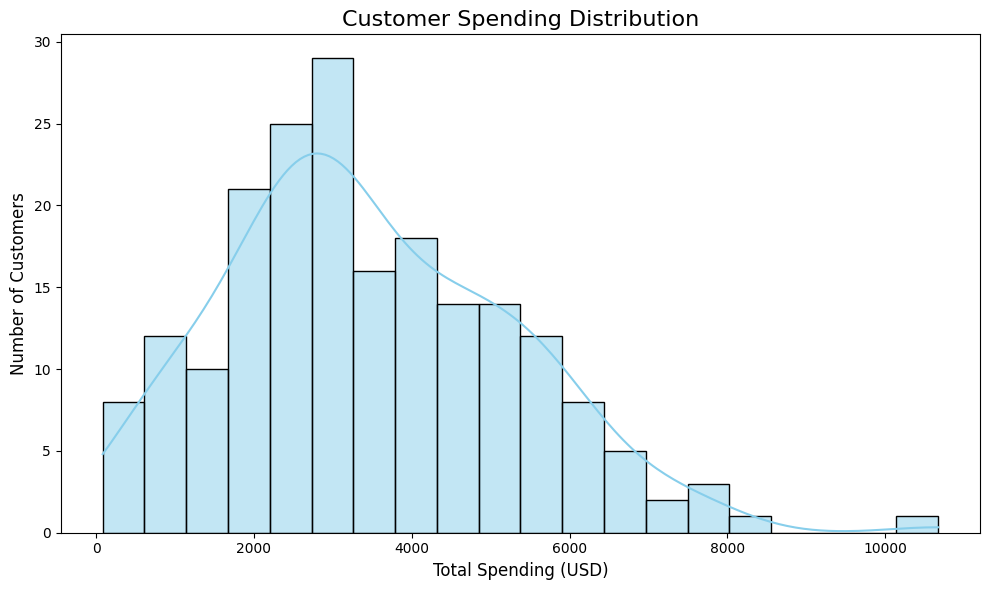

In [29]:
customer_spending = data.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=20, kde=True, color='skyblue')
plt.title('Customer Spending Distribution', fontsize=16)
plt.xlabel('Total Spending (USD)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Top 10 Products by Revenue:

This bar chart highlights the top 10 products that generated the most revenue, allowing you to focus on your best-performing products.

<ipython-input-30-0f80f6246065>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")  # Use a color palette


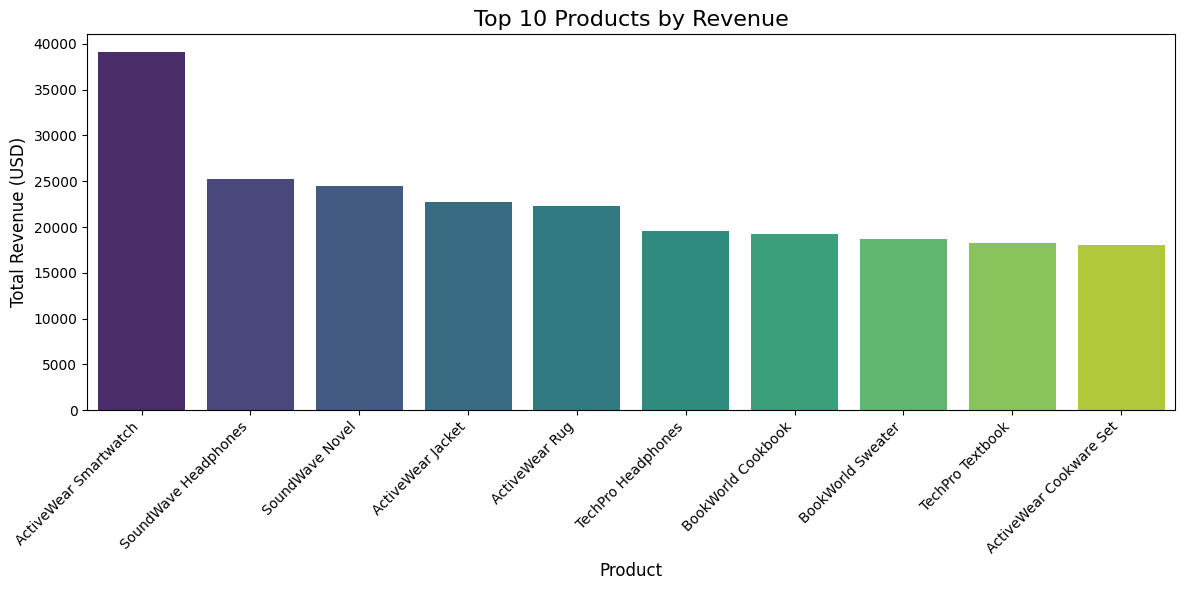

In [30]:
product_revenue = data.groupby('ProductName')['TotalValue'].sum()
top_products = product_revenue.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
